In [10]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Define Constants
batch_size = 128 # 갖고 오는 단위
epochs = 100 # 학습 횟수
num_classes = 10 # 0~9

# Download MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# train_images : 60000
# test_images : 10000

# Normalize the input so that each pixel value is between 0 to 1
train_images = train_images / 255
test_images = test_images / 255

# Define the model architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Corrected: input_shape=(28, 28)
    keras.layers.Dense(128, activation=tf.nn.relu),  # 128 neurons in the hidden layer with ReLU activation
    keras.layers.Dense(num_classes, activation='softmax')  # Output layer with softmax activation for 10 classes
])

model.compile(optimizer = 'adam', # 모델 설정
	loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # 손실함수 : 다중 클래스 분류 문제에서 사용하는 손실함수로, 정수 형태의 레이블을 입력으로 받음
	metrics=['accuracy'] # 평가 지표 : 정확도
)
# Learning
history = model.fit(train_images, train_labels, epochs = epochs, batch_size = batch_size)

# Evaluate the model using test dataset.
test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


469/469 [==============================] - 5s 8ms/step - loss: 0.3583 - accuracy: 0.9021
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1638 - accuracy: 0.9532
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1183 - accuracy: 0.9656
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0923 - accuracy: 0.9735
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0744 - accuracy: 0.9787
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0621 - accuracy: 0.9820
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0520 - accuracy: 0.9847
Epoch 8/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0447 - accuracy: 0.9868
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0373 - accuracy: 0.9897
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0321 - accuracy: 0.9914
E

In [13]:
import math

### Hepler funtion to display images
def show_sample(images, labels, sample_count=25):
  # Create a square with can fit {sample_count} images
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count, len(images), len(labels))

  plt.figure(figsize=(2*grid_count, 2*grid_count))
  for i in range(sample_count):
    plt.subplot(grid_count, grid_count, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.xlabel(labels[i])
  plt.show()

# Helper function to display specific digit images
def show_sample_digit(images, labels, digit, sample_count=25):
  # Create a square with can fit {sample_count} images
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count, len(images), len(labels))

  plt.figure(figsize=(2*grid_count, 2*grid_count))
  i = 0
  digit_count = 0
  while digit_count < sample_count:
    i += 1
    if (digit == labels[i]):
      plt.subplot(grid_count, grid_count, digit_count+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[i], cmap=plt.cm.gray)
      plt.xlabel(labels[i])
      digit_count += 1
  plt.show()

# Helper function to display specific digit images
def show_digit_image(image):
  # Draw digit image
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  # Major ticks every 20, minor ticks every 5
  major_ticks = np.arange(0, 29, 5)
  minor_ticks = np.arange(0, 29, 1)
  ax.set_xticks(major_ticks)
  ax.set_xticks(minor_ticks, minor=True)
  ax.set_yticks(major_ticks)
  ax.set_yticks(minor_ticks, minor=True)
  # And a corresponding grid
  ax.grid(which='both')
  # Or if you want different settings for the grids:
  ax.grid(which='minor', alpha=0.2)
  ax.grid(which='major', alpha=0.5)
  ax.imshow(image, cmap=plt.cm.binary)

  plt.show()

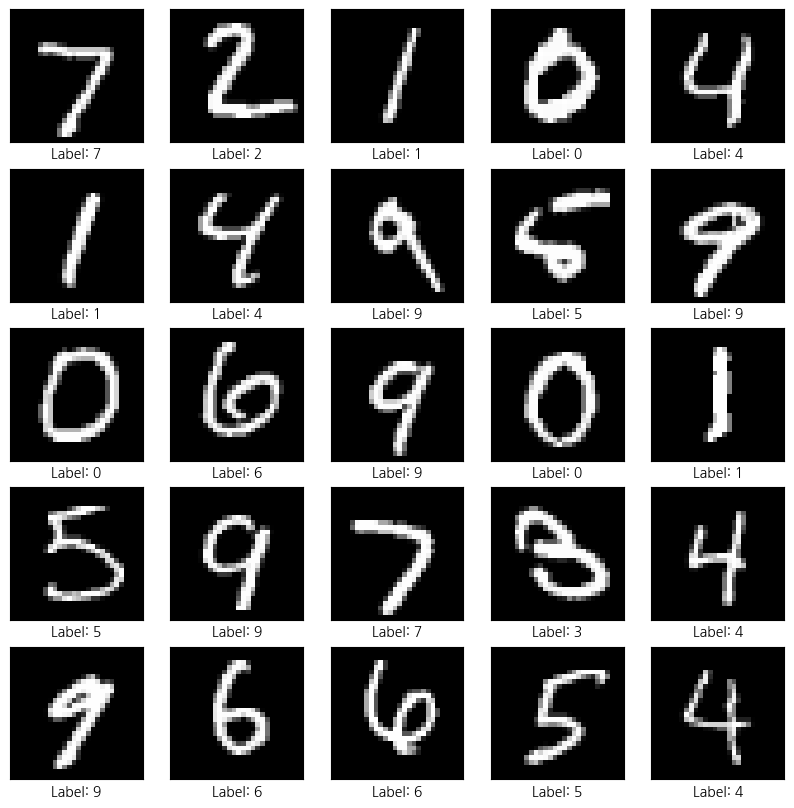

In [14]:
# Show the first 25 images in the training dataset.
show_sample(test_images, ['Label: %s' % label for label in test_labels])

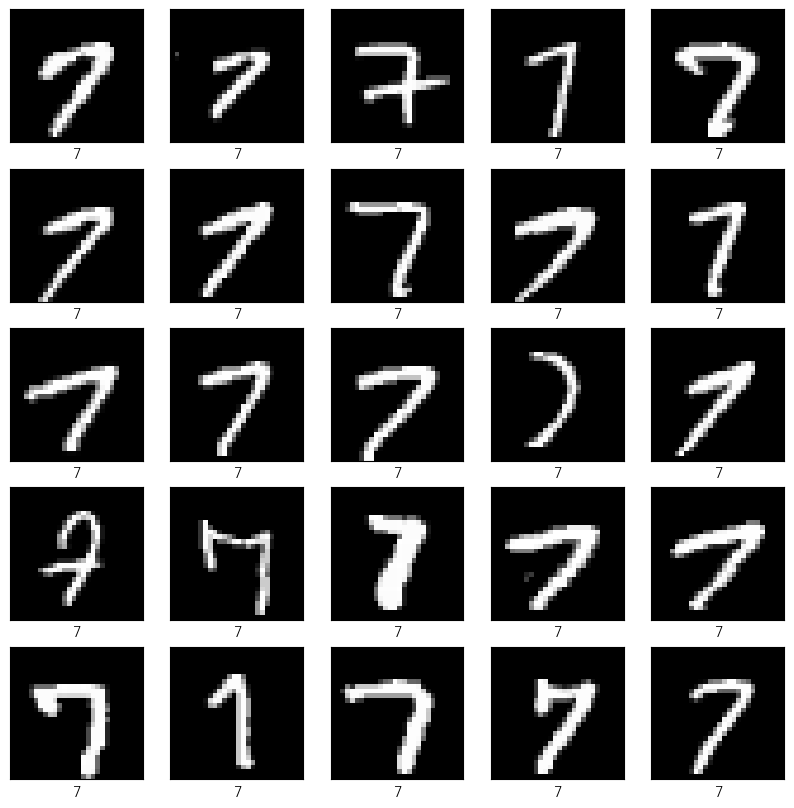

In [15]:
# Show digit 7 the first 25 images in the training dataset.
show_sample_digit(train_images, train_labels, 7)

Text(0, 0.5, 'accuracy')

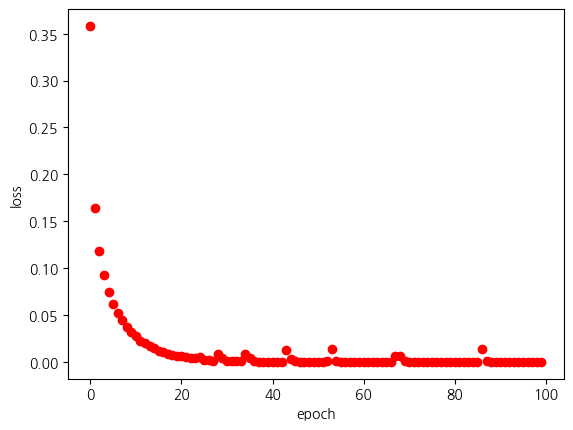

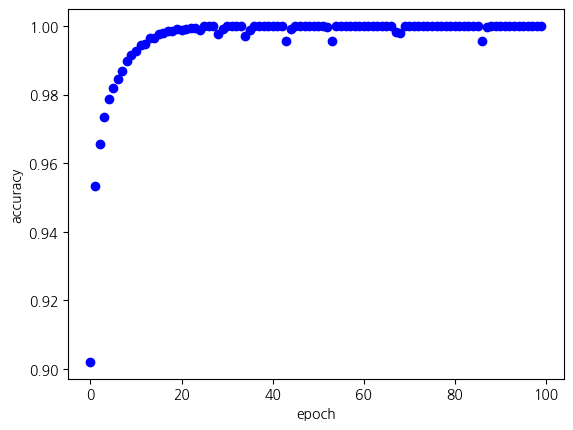

In [16]:
# epoch & loss
# Evaluate the model using test dataset. - Show performance

fig, loss_ax = plt.subplots()
fig, acc_ax = plt.subplots()

loss_ax.plot(history.history['loss'], 'ro')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax.plot(history.history['accuracy'], 'bo')
acc_ax.set_xlabel('epoch')
acc_ax.set_ylabel('accuracy')